In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.__dir__()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print('The unique labels (targets) in this data are', str(np.unique(iris.target)))
print("Labels names", list(iris.target_names))

target_idx_to_name = dict(zip(np.unique(iris.target), iris.target_names))
print(target_idx_to_name)

The unique labels (targets) in this data are [0 1 2]
Labels names ['setosa', 'versicolor', 'virginica']
{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [5]:
labels = pd.DataFrame(iris.target, columns=['species']).applymap(lambda t: target_idx_to_name[t])
iris_full = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_full = iris_full.join(labels)
iris_full

C:\Users\Murav\AppData\Local\Temp\ipykernel_1456\2697548377.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels = pd.DataFrame(iris.target, columns=['species']).applymap(lambda t: target_idx_to_name[t])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Задание: Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby).

In [6]:
iris_full.groupby('species') # а как дальше вычислить корреляции?

Задание: Визуализировать распределения классов на всех парах переменных.


In [7]:
# используйте seaborn pairplot(data=iris_full, hue='species')

 ## Подготовим данные для обучения

In [8]:
# Для этого анализа будем использовать только длину и ширину лепестка.
# Можете попробовать другие комбинации признаков

X = iris.data[:, [2, 3]]
y = iris.target
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
pd.DataFrame(X, columns=iris.feature_names[2:]).join(labels)

,petal length (cm),petal width (cm),species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


### Разделим данные на обучающие и тестовые наборы данных

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


Если мы построим исходные данные, мы увидим, что один из классов линейно разделим, а два других — нет.

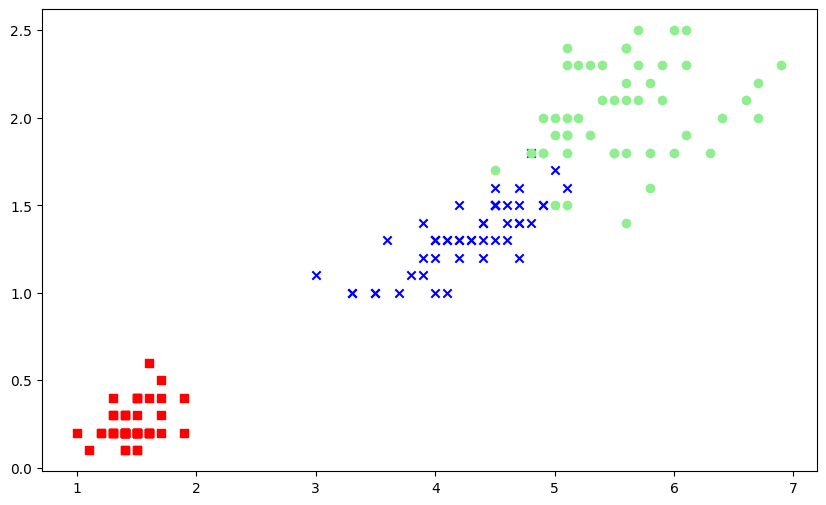

In [12]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(
        x=X[y == cl, 0], y=X[y == cl, 1],
        color=cmap(idx), marker=markers[idx], label=cl
    )

## Models
Теперь работа с моделями

In [13]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

### LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} %'.format(100*reg.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} %'.format(100*reg.score(X_test, y_test)))

The accuracy of the svm classifier on training data is 93.13 %
The accuracy of the svm classifier on test data is 90.66 %


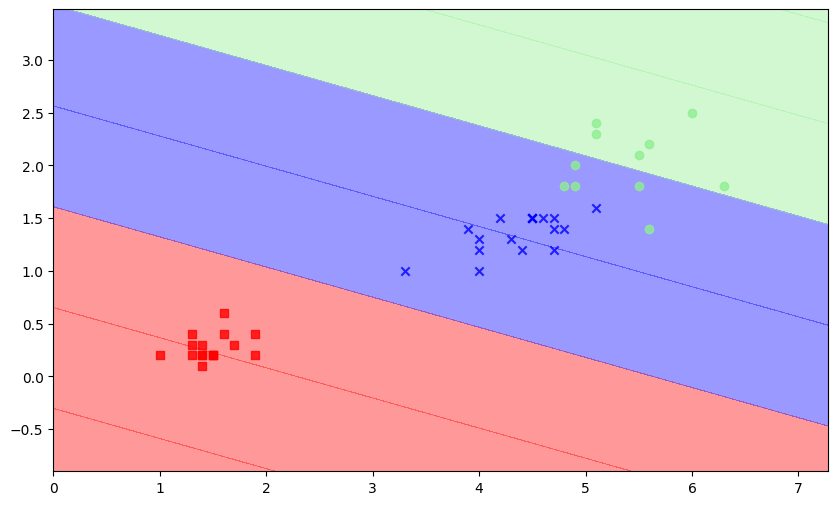

In [24]:
plot_decision_regions(X_test, y_test, reg)

### LinearDiscriminantAnalysis

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} %'.format(100*lda.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} %'.format(100*lda.score(X_test, y_test)))

The accuracy of the svm classifier on training data is 95.24 %
The accuracy of the svm classifier on test data is 95.56 %


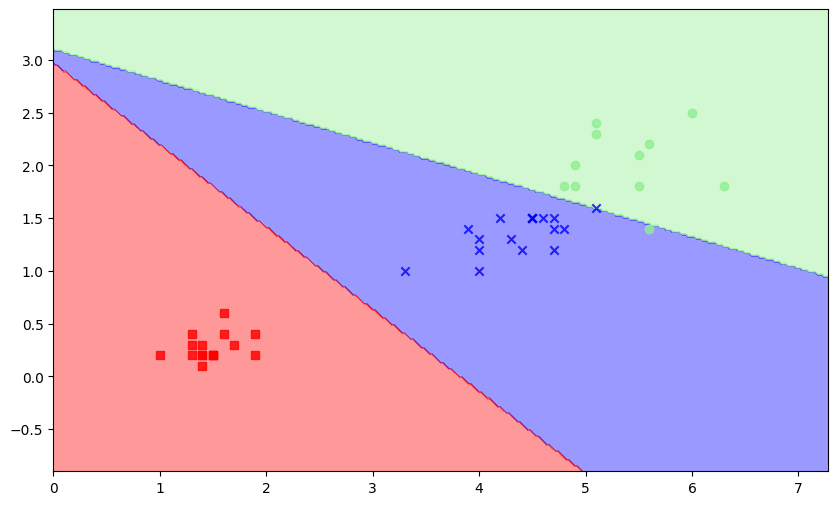

In [26]:
plot_decision_regions(X_test, y_test, lda)

### QuadraticDiscriminantAnalysis

In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} %'.format(100*qda.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} %'.format(100*qda.score(X_test, y_test)))

The accuracy of the svm classifier on training data is 96.19 %
The accuracy of the svm classifier on test data is 100.00 %


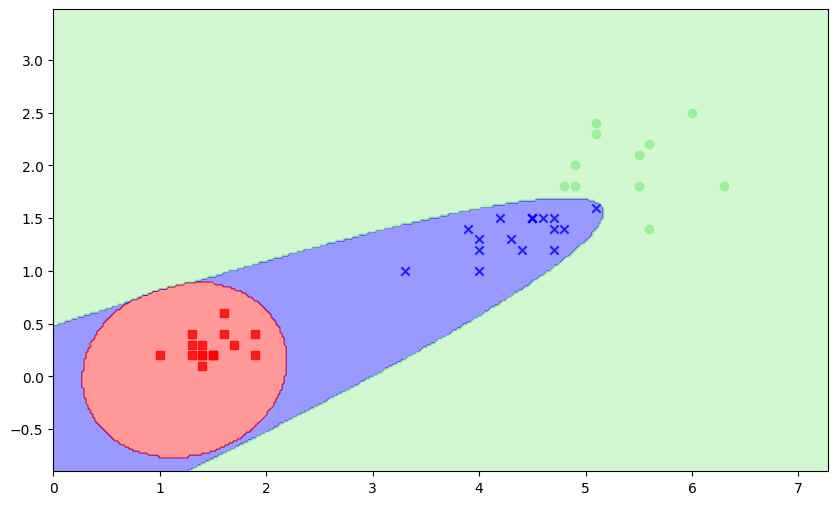

In [28]:
plot_decision_regions(X_test, y_test, qda)

### Support Vector Machines — SVM

In [ ]:
from sklearn.svm # import ???

svm = # ??? # Пробуем линейное и квадратичное ядро
svm.fit(X_train, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} %'.format(100*svm.score(X_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} %'.format(100*svm.score(X_test, y_test)))

In [10]:
plot_decision_regions(X_test, y_test, svm)

NameError: name 'plot_decision_regions' is not defined